In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [10]:
i='Visadataset.csv'
dir=os.path.join(os.getcwd(),'DataFile')
path=dir+'\\'+i

In [11]:
visa_df=pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [12]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
cat_columns,num_columns

(Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'),
 Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'))

# Bi variate analysis

- We already seen uni variate analysis

- we performed the categorical columns analysis

      - Frequency table   (value counts)

      - Bar chart

      - Relative frequency table (value counts Normalized form)

      - pie chart

 
- we performed the numerical columns analysis

    - Histogram

    - Distribution plots

    - Box plot 

    - Outliers anaiysis 

    - Filling the outliers 

- Now we will do categorical - categorical analysis

- numerical - numerical analysis 

- categorical - numerical analysis

# Categorical to Categorical 

- Lets consider two columns

    - continent

    - case status

In [15]:
visa_df['continent']

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

In [16]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [17]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Task**

- Find the certified observations continent wise 

- Find the Denied observations continent wise 

In [19]:

con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con3= con1&con2
visa_df[con3]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [20]:
cer_list=[]
keys=visa_df['continent'].value_counts().keys()
for i in keys:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=con1&con2
    cer_count=len(visa_df[con3])
    print(f' The number of certified visa from {i} is : {cer_count} ')
    cer_list.append(cer_count)

cer_list

 The number of certified visa from Asia is : 11012 
 The number of certified visa from Europe is : 2957 
 The number of certified visa from North America is : 2037 
 The number of certified visa from South America is : 493 
 The number of certified visa from Africa is : 397 
 The number of certified visa from Oceania is : 122 


[11012, 2957, 2037, 493, 397, 122]

In [21]:
deni_list=[]
keys=visa_df['continent'].value_counts().keys()
for i in keys:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Denied'
    con3=con1&con2
    den_count=len(visa_df[con3])
    print(f'The number of Denied visa from {i} is : {den_count}')
    deni_list.append(den_count)

deni_list

The number of Denied visa from Asia is : 5849
The number of Denied visa from Europe is : 775
The number of Denied visa from North America is : 1255
The number of Denied visa from South America is : 359
The number of Denied visa from Africa is : 154
The number of Denied visa from Oceania is : 70


[5849, 775, 1255, 359, 154, 70]

In [22]:
cert_list,den_list=[],[]
continents=visa_df['continent'].value_counts().keys()
for i in continents:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    cert_con= con1&con2
    den_con=con1&con3
    cert_count=len(visa_df[cert_con])
    den_count=len(visa_df[den_con])
    print(f'The number of certified visa from {i} is : {cert_count}')
    print(f'The number of Denied visa from {i} is : {den_count}')
    cert_list.append(cert_count)
    den_list.append(den_count)

The number of certified visa from Asia is : 11012
The number of Denied visa from Asia is : 5849
The number of certified visa from Europe is : 2957
The number of Denied visa from Europe is : 775
The number of certified visa from North America is : 2037
The number of Denied visa from North America is : 1255
The number of certified visa from South America is : 493
The number of Denied visa from South America is : 359
The number of certified visa from Africa is : 397
The number of Denied visa from Africa is : 154
The number of certified visa from Oceania is : 122
The number of Denied visa from Oceania is : 70


In [23]:
cert_list, den_list

([11012, 2957, 2037, 493, 397, 122], [5849, 775, 1255, 359, 154, 70])

In [24]:
df1=pd.DataFrame(cer_list,index=keys,columns=['Certified'])
df1

,Certified
continent,
Asia,11012
Europe,2957
North America,2037
South America,493
Africa,397
Oceania,122


In [25]:
df11=pd.DataFrame(zip(keys,cer_list),columns=['continent','certified'])
df11

,continent,certified
0,Asia,11012
1,Europe,2957
2,North America,2037
3,South America,493
4,Africa,397
5,Oceania,122


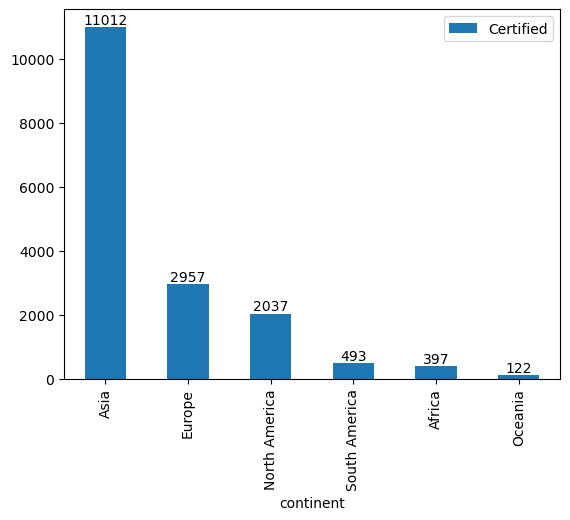

In [26]:
ax=df1.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

In [27]:
df2=pd.DataFrame(deni_list,index=keys,columns=['Denined'])
df2

,Denined
continent,
Asia,5849
Europe,775
North America,1255
South America,359
Africa,154
Oceania,70


In [28]:
df22=pd.DataFrame(zip(keys,deni_list),columns=['continent','Denined'])
df22

,continent,Denined
0,Asia,5849
1,Europe,775
2,North America,1255
3,South America,359
4,Africa,154
5,Oceania,70


<Axes: xlabel='continent'>

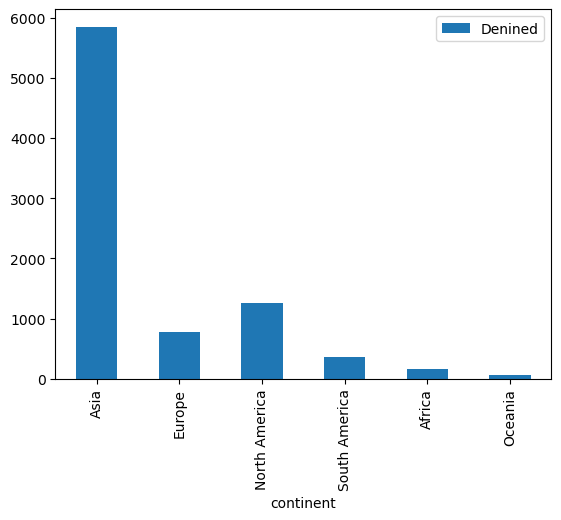

In [29]:
df2.plot(kind='bar')

In [30]:
index=visa_df['continent'].unique()
df3=pd.DataFrame(zip(cer_list,deni_list),index=index,columns=['Certified','Denined'])
df3

,Certified,Denined
Asia,11012,5849
Africa,2957,775
North America,2037,1255
Europe,493,359
South America,397,154
Oceania,122,70


[Text(0, 0, '11012'),
 Text(0, 0, '2957'),
 Text(0, 0, '2037'),
 Text(0, 0, '493'),
 Text(0, 0, '397'),
 Text(0, 0, '122')]

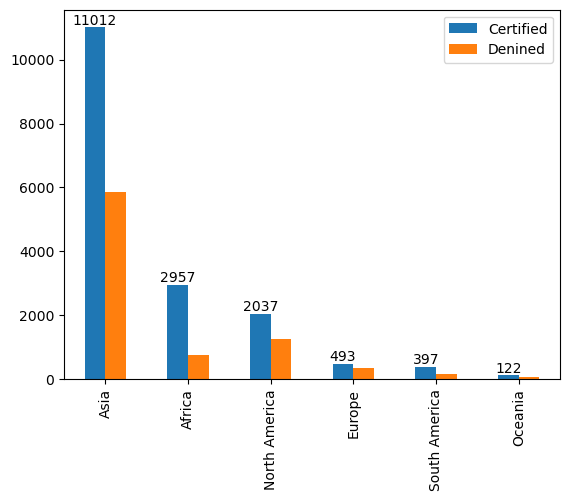

In [31]:
ax=df3.plot(kind='bar')
ax.bar_label(ax.containers[0])


# Cross Tab

- The above data frame we can make by using a method: cross tab

- It is available in pandas

- It takes two argumenst

    - index
    
    - column

- In above data frame index column is : continent

- In above data frame Data column is : case_status

In [34]:
df4=pd.crosstab(visa_df['continent'],visa_df['case_status'])
df4          # bivariate

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

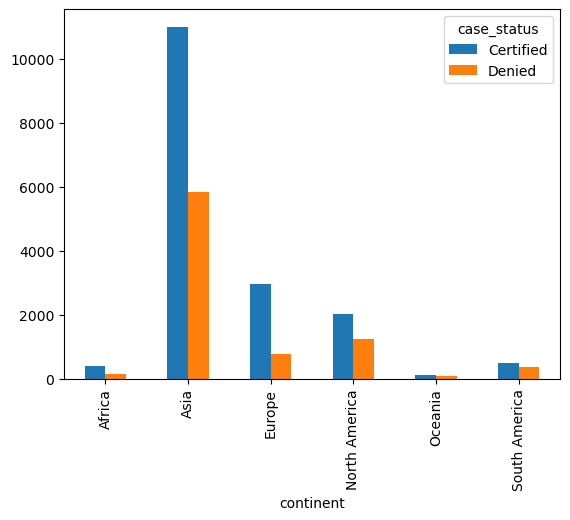

In [35]:
df4.plot(kind='bar')

# Multivariate analysis

- Education

- continent

- Case status

- we already know from Asia there 11k Accepted visa

- In that I want furthur break down based on education

- here also pd.cross tab

- first fix your index of any one column out of three column

- Then keep two column in a list and pass as data column

In [37]:
df5=pd.crosstab(visa_df['continent'],[visa_df['case_status'],visa_df['education_of_employee']])
df5

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

In [38]:
df55=pd.crosstab(visa_df['continent'],[visa_df['education_of_employee'],visa_df['case_status']])
df55

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

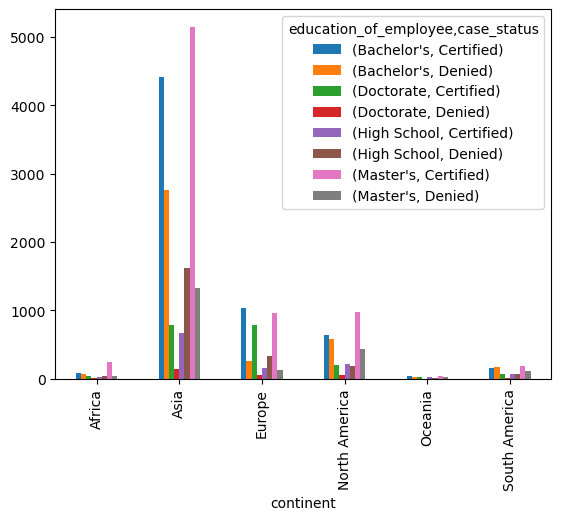

In [39]:
df55.plot(kind='bar')

<Axes: xlabel='continent'>

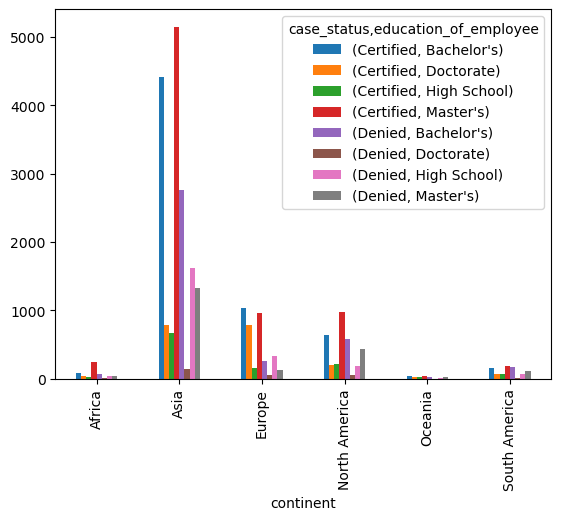

In [40]:
df5.plot(kind='bar')

In [41]:
visa_df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [43]:
i='Visadataset.csv'
dir=os.path.join(os.getcwd(),'DataFile')
path=dir+'\\'+i

In [44]:
visa_df=pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [45]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
cat_columns,num_columns

(Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'),
 Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'))

# Numerical vs Numerical

- To understand numerical column relation we need to plot scatter plots 

- scatter plots gives the ralation between two numerical columns 

- Bar chart - pie chart - histogram - scatter plots

- scatter plot under matplotlib package 

- **plt.scatter**

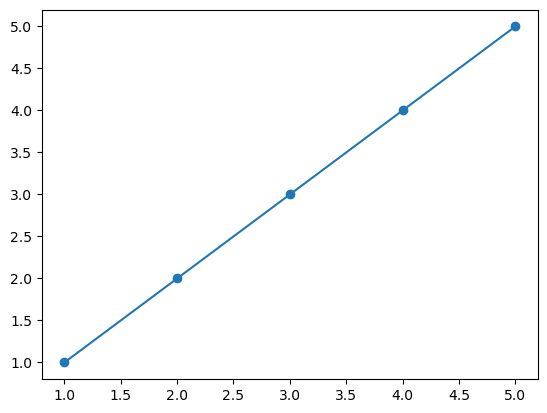

In [48]:

x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)

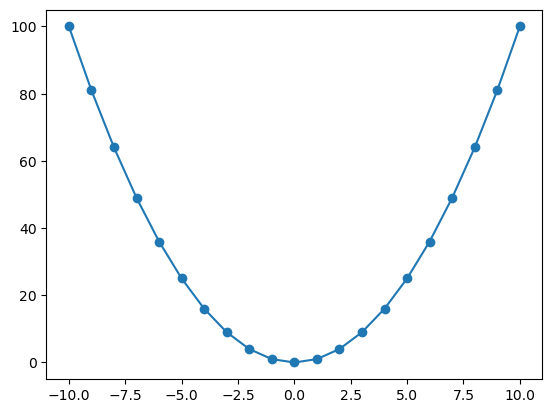

In [49]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [50]:
# 1- read one numerical column
# 2- read another numerical column'
# 2- apply the scatter plot

In [51]:
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

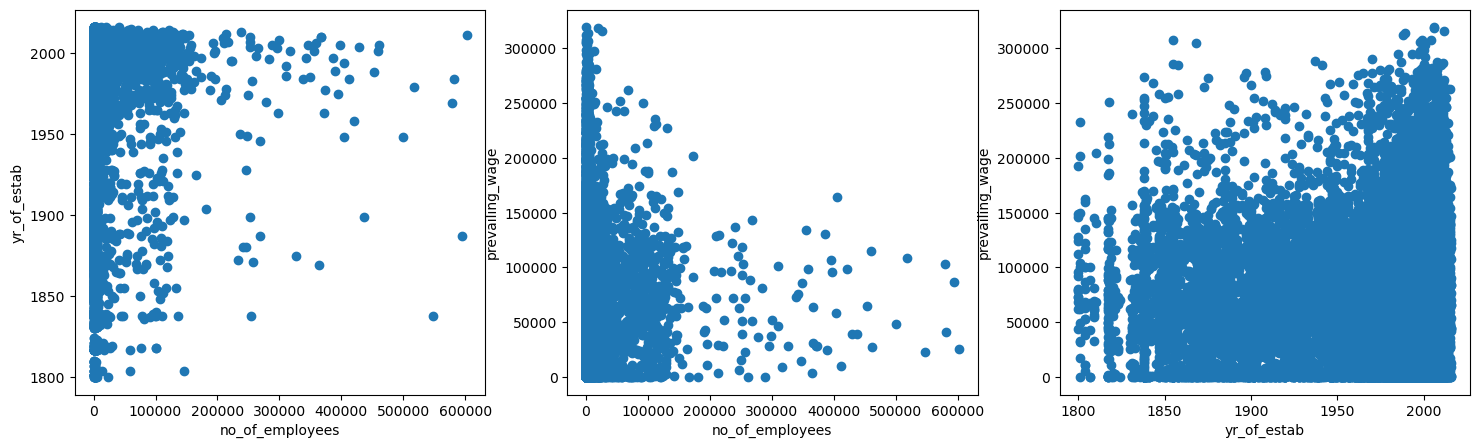

In [55]:
x=visa_df['no_of_employees']
y=visa_df['yr_of_estab']
z=visa_df['prevailing_wage']
plt.figure(figsize=(18,5))
plt.subplot(1,3,1).scatter(x,y)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
#########################################
plt.subplot(1,3,2).scatter(x,z)
plt.xlabel('no_of_employees')
plt.ylabel( 'prevailing_wage')
##########################################
plt.subplot(1,3,3).scatter(y,z)
plt.xlabel('yr_of_estab')
plt.ylabel('prevailing_wage')
plt.show()

- Implement the covariance function 

- covariance vs correlation 

    - covariance will tell about the column have relation or not 

    - covariance will explain about relation status 

        - positive relation 

        - negative relation 

        - no relation 

- correlation tells about how much relation between two variable

- it denotes with 'r'

- r varies from -1 to 1

- -1 to 0 indicates negative relation quantity

- 0 to 1 indicates postive relation quantity

- 0 indicates no relation

<img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="_Yi8ZuaCN_PG4-EP5fuL2Qs_19" data-atf="0">

# method name is coor

In [60]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


# Heat map

- Heat map is one of the important visualization method , to show the Matrix form of 
values 

- it is under **seaborn** package 

- in every matrix we have heighest values and lowest values available 

- heat map will give color visuliation 

- Also it provide color bar , which color indicates which value 

In [76]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


<Axes: >

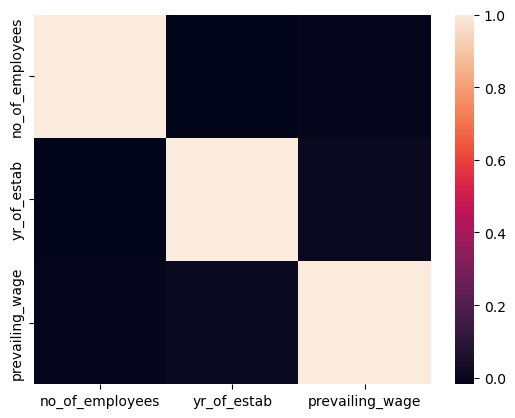

In [64]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data)

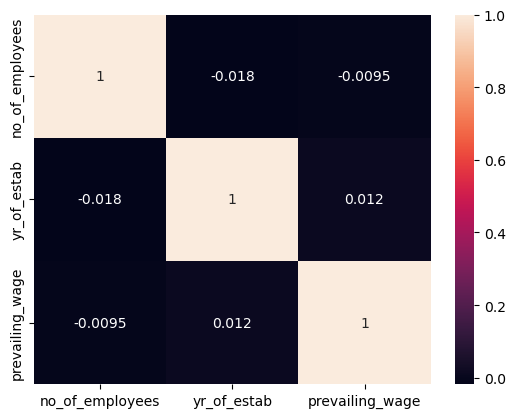

In [65]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True)
plt.show()

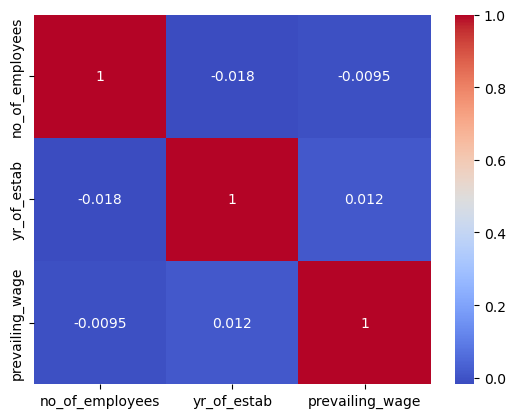

In [66]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='coolwarm')
plt.show()

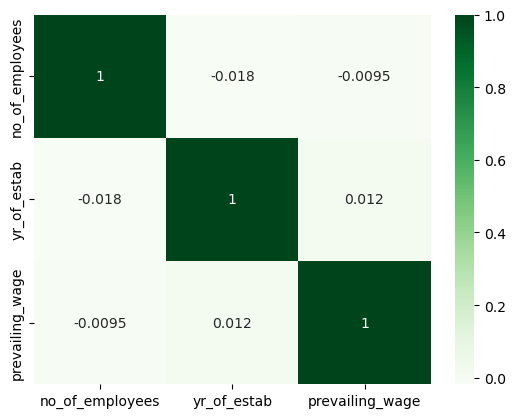

In [68]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='Greens')
plt.show()

- by seeing the graphs we might not say the relation status 

- it is best practice get the percentage of relation using correlation 

- all 3 columns having approximately zero percentage of relation

- which indicates all the columns having no relation 

- no relation menas independent each other

- in  ML we expect the input columns should be independent each 

- corr method gives matrix view

- we have 3 columns 3*3 total 9 fileds 

- if a data has 20 columns then 20*20 total 40 fileds

- Thats why always go with Heat map visulaization